In [1]:
import ast
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datasets import load_dataset

# loading data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# convert to datetime
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
# convert the string representation of list to actual list
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [13]:
df['job_title_short'].value_counts()

job_title_short
Data Analyst                 196075
Data Engineer                186241
Data Scientist               172286
Business Analyst              49063
Software Engineer             44929
Senior Data Engineer          44563
Senior Data Scientist         36957
Senior Data Analyst           29216
Machine Learning Engineer     14080
Cloud Engineer                12331
Name: count, dtype: int64

In [11]:
df['job_country'].value_counts().iloc[0:20]

job_country
United States     206292
India              51088
United Kingdom     40375
France             39922
Germany            27694
Spain              25100
Singapore          23696
Sudan              21781
Netherlands        20631
Italy              17013
Canada             16029
Mexico             15139
Poland             14793
Portugal           14508
Australia          12955
South Africa       12414
Belgium            12078
Philippines        11786
Ireland            11162
Switzerland         9924
Name: count, dtype: int64

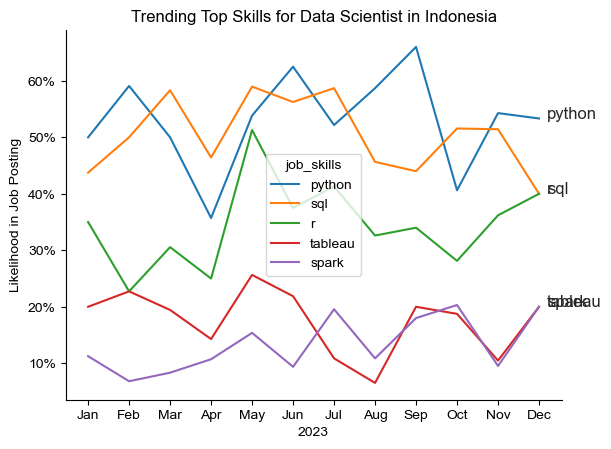

In [2]:
job_title_short = 'Data Scientist'
job_country = 'Indonesia'

df_first_filter = df[(df['job_title_short'] == job_title_short) & (df['job_country'] == job_country)].copy()

df_first_filter['job_posted_month_no'] = df_first_filter['job_posted_date'].dt.month  # extract month number

df_explode = df_first_filter.explode('job_skills')

df_pivot = df_explode.pivot_table(index='job_posted_month_no', columns='job_skills', aggfunc='size', fill_value=0)

df_pivot.loc['Total'] = df_pivot.sum()
df_pivot = df_pivot[df_pivot.loc['Total'].sort_values(ascending=False).index]
df_pivot = df_pivot.drop('Total')

df_total = df_first_filter.groupby('job_posted_month_no').size()

df_percentage = df_pivot.div(df_total/100, axis=0)

df_percentage = df_percentage.reset_index()
df_percentage['job_posted_month'] = df_percentage['job_posted_month_no'].apply(lambda x: pd.to_datetime(x, format='%m').strftime('%b'))
df_percentage = df_percentage.set_index('job_posted_month')
df_percentage = df_percentage.drop(columns=['job_posted_month_no'])

df_plot = df_percentage.iloc[:, :5]

sns.lineplot(data=df_plot, dashes=False, palette='tab10')
sns.set_theme(style='ticks')
sns.despine()

plt.title(f'Trending Top Skills for {job_title_short} in {job_country}')
plt.ylabel('Likelihood in Job Posting')
plt.xlabel('2023')
# plt.legend().remove()

for i in range(5):
  plt.text(11.2, df_plot.iloc[-1, i], df_plot.columns[i])

from matplotlib.ticker import PercentFormatter
ax = plt.gca()
ax.yaxis.set_major_formatter(PercentFormatter(decimals=0))